<a href="https://colab.research.google.com/github/vladiant/SoftUniMachineLearning2019/blob/master/2_Linear_And_Logistic_Regression/LinearLogisticRegresionRANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [ ]:
housing_data = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None)

In [ ]:
housing_data.columns =["crime_rate", "zoned_land", "industry", "bounds_river", "nox_conc", "rooms", "age", "distance", "highways", "tax", "pt_ratio", "b_estimator", "pop_stat", "price"]

In [ ]:
housing_data_input = housing_data.drop('price', axis=1)
housing_data_output = housing_data.price

In [ ]:
model = LinearRegression()
model.fit(housing_data_input, housing_data_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(housing_data_input, housing_data_output)

0.7198065414937174

In [ ]:
ransac = RANSACRegressor(LinearRegression(), min_samples=50, max_trials=100, residual_threshold=5.0)

In [ ]:
ransac.fit(housing_data_input, housing_data_output)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50,
                random_state=None, residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

In [ ]:
inliers = housing_data_input[ransac.inlier_mask_]
outliers = housing_data_input[~ransac.inlier_mask_]

In [ ]:
print(ransac.score(inliers, housing_data_output[ransac.inlier_mask_]))

0.9024076494298344


In [ ]:
print(ransac.score(outliers, housing_data_output[~ransac.inlier_mask_]))

0.36142492549965544


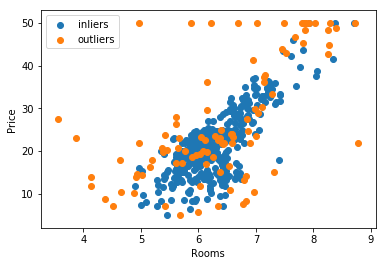

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inliers.rooms, housing_data_output[ransac.inlier_mask_], label = "inliers")
plt.scatter(outliers.rooms, housing_data_output[~ransac.inlier_mask_], label = "outliers")
plt.legend()
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_features = PolynomialFeatures(2, interaction_only=False)

In [ ]:
polynomial_input = polynomial_features.fit_transform(housing_data_input)

In [ ]:
polynomial_model = LinearRegression()

In [ ]:
polynomial_model.fit(polynomial_input, housing_data_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 2 -> 0.8863751179612701
# 3 -> 0.9989291660161697
polynomial_model.score(polynomial_input, housing_data_output)

0.8863751179612701

In [ ]:
polynomial_model.coef_.shape

(105,)